# Simulated Experiment - Resonator with Thermal Noise

## Load Libraries

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Experimental set values

In [2]:
# experimental parameters [visible to operator]
T = 300 # temperature in units of K
S = 5e4 # sampling rate of ADC in units of Hz
t_meas = 10 # data acquisition time in units of s

## Hidden values and data

In [3]:
# intrinsic experimental parameters [hidden from operator]
# resonator properties
m = 5.5e-15 # resonator mass in units of kg
k = 6.5e-6 # spring constant in units of N/m
f0 = 5.5e3 # resonance frequency in units of Hz
w0 = 2*np.pi*f0 # angular resonance frequency in units of rad/s
Q = 4.5e4 # mechanical quality factor, no units

# other parameters
kB = 1.38e-23 # Boltzmann constant in units of J/K
h = 6.63e-34 # Plack constant in units of Js
G = 1e7 # conversion gain of the interferometer in units of V/m
s_n = 1e-6 # voltage noise PSD in units of V^2/Hz
s_f = 4*kB*T*m*w0/Q # mean value of thermomechanical noise PSD (single-sided) in units of N^2/Hz
N_phonon = kB*T/(h*f0) # mean number of phonons in resonator
tau = Q/(np.pi*f0)

# initialize PSD arrays
df = 1/t_meas # frequency resolution
N = int(t_meas*S/2) # number of point in PSD arrays
n = t_meas/tau # number of uncorrelated variance estimations
f = np.linspace(df, S/2, N) # single-sided spectral frequency values
S_f = np.abs(np.random.normal(s_f, s_f/np.sqrt(n), N)) # force noise PSD
chi_squared = 1/m**2/(2*np.pi)**4/((f0**2 - f**2)**2 + f0**2*f**2/Q**2) # susceptibility function
S_x = S_f*chi_squared # displacement PSD
S_amp = np.abs(np.random.normal(s_n, s_n/N, N))
#np.abs(np.random.normal(s_n, s_n/N, N)) # amplifier noise PSD
S_v = S_x*G**2 + S_amp # total measured voltage PSD

# FDT_checksum = sum(S_x)*df*k/(kB*T)
# print(FDT_checksum) # should be 1 on average

## Plot

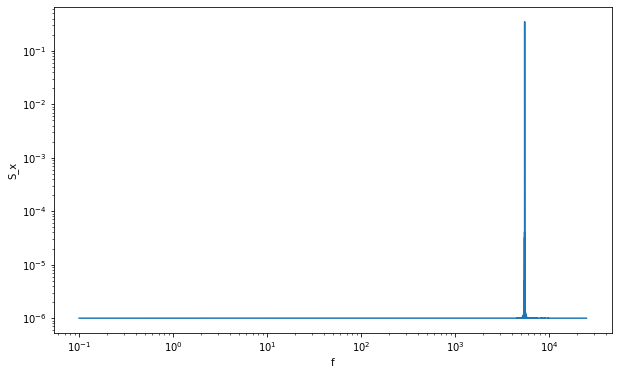

In [5]:
plt.figure(
    num=1,
    figsize=(10,6),
    facecolor='white')
plt.xlabel('f')
plt.ylabel('S_x')
plt.loglog(f,S_v)
plt.show()

## Save

In [6]:
savedir = 'data' # directory where data is saved
os.makedirs(savedir, exist_ok=True) # create directory

data = np.array([f,np.real(S_v)]).T
np.savetxt(savedir +'/PSD.dat', data, delimiter=',')